In [1]:
import os
import matplotlib
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

2024-11-11 01:58:11.694482: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-11 01:58:11.697962: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-11 01:58:11.708987: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731279491.726879   12687 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731279491.732039   12687 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 01:58:11.750507: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
data = []
labels = []

In [6]:
for num in range(0, 43):
    path = os.path.join('archive/train',str(num))
    imagePaths = os.listdir(path)
    for img in imagePaths:
      image = Image.open(path + '/'+ img)
      image = image.resize((30,30))
      image = img_to_array(image)
      data.append(image)
      labels.append(num)

In [7]:
data = np.array(data)
labels = np.array(labels)

In [8]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [14]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [15]:
class Net:
  @staticmethod
  def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    if K.image_data_format() == 'channels_first':
      inputShape = (depth, heigth, width)
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=inputShape))
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(classes, activation='softmax'))
    return model

In [17]:
epochs = 10
model = Net.build(width=30, height=30, depth=3, classes=43)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test), epochs=epochs)

Epoch 1/10


2024-11-11 02:12:53.902129: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 338763600 exceeds 10% of free system memory.


490/491 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0478 - loss: 4.9205

2024-11-11 02:13:21.391947: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 84693600 exceeds 10% of free system memory.


491/491 ━━━━━━━━━━━━━━━━━━━━ 29s 55ms/step - accuracy: 0.0479 - loss: 4.9157 - val_accuracy: 0.0574 - val_loss: 3.4801
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.1818 - loss: 3.0270 - val_accuracy: 0.7993 - val_loss: 0.7137
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.7150 - loss: 0.9730 - val_accuracy: 0.8968 - val_loss: 0.3788
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 27s 56ms/step - accuracy: 0.7962 - loss: 0.6647 - val_accuracy: 0.9278 - val_loss: 0.3044
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 28s 56ms/step - accuracy: 0.8306 - loss: 0.5611 - val_accuracy: 0.9458 - val_loss: 0.2081
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 28s 57ms/step - accuracy: 0.8564 - loss: 0.4732 - val_accuracy: 0.9444 - val_loss: 0.2016
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 27s 55ms/step - accuracy: 0.8677 - loss: 0.4303 - val_accuracy: 0.9607 - val_loss: 0.1495
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 27s 55ms/step - accuracy: 0.8712 - loss: 0.4293 - val_accurac

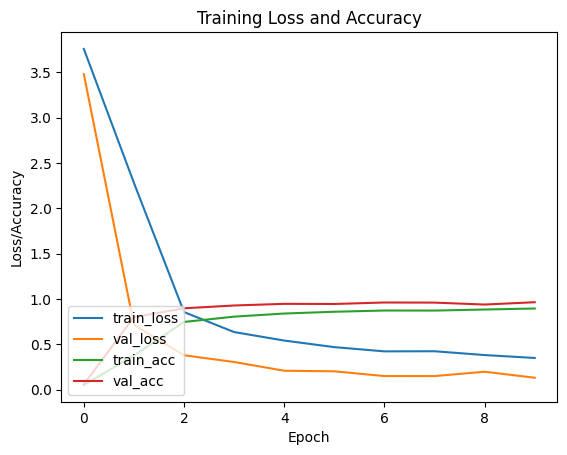

In [19]:

plt.figure()
N = epochs
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()